## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

# L1

In [5]:
from keras.regularizers import l1

def build_mlp_l1(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp_l1(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with Regulizer = 0.010000


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.

50000/50000 [==============================] - 33s 664us/step - loss: 2.4626 - acc: 0.0994 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 28/50
50000/50000 [==============================] - 30s 603us/step - loss: 2.4626 - acc: 0.0989 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 29/50
50000/50000 [==============================] - 30s 596us/step - loss: 2.4626 - acc: 0.0973 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 33s 654us/step - loss: 2.4626 - acc: 0.0985 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 32s 646us/step - loss: 2.4626 - acc: 0.0974 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 31s 623us/step - loss: 2.4626 - acc: 0.0994 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 31s 623us/step - loss: 2.4626 - acc: 0.0982 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 34/50
50000/50000 [=======

Epoch 28/50
50000/50000 [==============================] - 29s 578us/step - loss: 3.6573 - acc: 0.5743 - val_loss: 3.7741 - val_acc: 0.5152
Epoch 29/50
50000/50000 [==============================] - 28s 552us/step - loss: 3.6033 - acc: 0.5777 - val_loss: 3.7507 - val_acc: 0.5091
Epoch 30/50
50000/50000 [==============================] - 24s 472us/step - loss: 3.5444 - acc: 0.5799 - val_loss: 3.6891 - val_acc: 0.5197
Epoch 31/50
50000/50000 [==============================] - 23s 469us/step - loss: 3.4934 - acc: 0.5838 - val_loss: 3.6063 - val_acc: 0.5295
Epoch 32/50
50000/50000 [==============================] - 25s 501us/step - loss: 3.4380 - acc: 0.5866 - val_loss: 3.6450 - val_acc: 0.4938
Epoch 33/50
50000/50000 [==============================] - 26s 518us/step - loss: 3.3868 - acc: 0.5879 - val_loss: 3.5222 - val_acc: 0.5205
Epoch 34/50
50000/50000 [==============================] - 26s 525us/step - loss: 3.3357 - acc: 0.5909 - val_loss: 3.5083 - val_acc: 0.5167
Epoch 35/50
50000/50

50000/50000 [==============================] - 18s 358us/step - loss: 1.1426 - acc: 0.5994 - val_loss: 1.3416 - val_acc: 0.5259
Epoch 29/50
50000/50000 [==============================] - 19s 370us/step - loss: 1.1273 - acc: 0.6041 - val_loss: 1.3581 - val_acc: 0.5201
Epoch 30/50
50000/50000 [==============================] - 19s 381us/step - loss: 1.1159 - acc: 0.6085 - val_loss: 1.3404 - val_acc: 0.5300
Epoch 31/50
50000/50000 [==============================] - 18s 366us/step - loss: 1.1006 - acc: 0.6143 - val_loss: 1.4322 - val_acc: 0.4991
Epoch 32/50
50000/50000 [==============================] - 18s 360us/step - loss: 1.0892 - acc: 0.6189 - val_loss: 1.3245 - val_acc: 0.5329
Epoch 33/50
50000/50000 [==============================] - 18s 363us/step - loss: 1.0767 - acc: 0.6214 - val_loss: 1.3803 - val_acc: 0.5101
Epoch 34/50
50000/50000 [==============================] - 18s 363us/step - loss: 1.0652 - acc: 0.6269 - val_loss: 1.4652 - val_acc: 0.4962
Epoch 35/50
50000/50000 [=======

50000/50000 [==============================] - 18s 361us/step - loss: 1.1419 - acc: 0.5973 - val_loss: 1.3572 - val_acc: 0.5238
Epoch 29/50
50000/50000 [==============================] - 18s 365us/step - loss: 1.1305 - acc: 0.6026 - val_loss: 1.3452 - val_acc: 0.5252
Epoch 30/50
50000/50000 [==============================] - 18s 365us/step - loss: 1.1173 - acc: 0.6088 - val_loss: 1.3968 - val_acc: 0.5135
Epoch 31/50
50000/50000 [==============================] - 18s 363us/step - loss: 1.1033 - acc: 0.6134 - val_loss: 1.3578 - val_acc: 0.5251
Epoch 32/50
50000/50000 [==============================] - 18s 365us/step - loss: 1.0866 - acc: 0.6170 - val_loss: 1.3527 - val_acc: 0.5277
Epoch 33/50
50000/50000 [==============================] - 18s 369us/step - loss: 1.0763 - acc: 0.6189 - val_loss: 1.3817 - val_acc: 0.5177
Epoch 34/50
50000/50000 [==============================] - 18s 367us/step - loss: 1.0637 - acc: 0.6261 - val_loss: 1.4206 - val_acc: 0.5054
Epoch 35/50
50000/50000 [=======

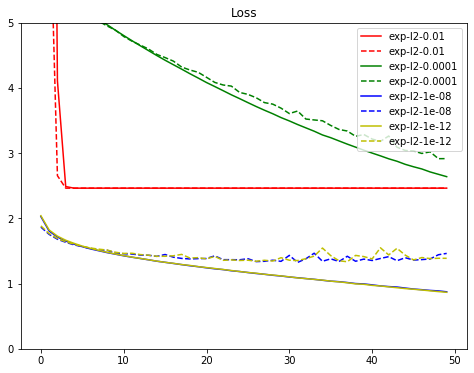

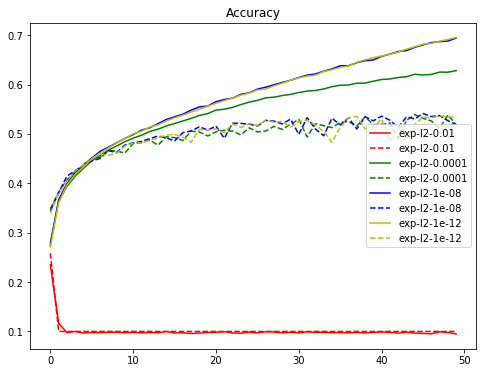

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# L1_L2

In [9]:
from keras.regularizers import l1_l2

def build_mlp_l1_l2(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp_l1_l2(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 375us/step - loss: 18.7951 - acc: 0.2718 - val_loss: 17.3534 - val_acc: 0.3342
Epoch 2/50
50000/50000 [==============================] - 19s 380us/step - loss: 16.1333 - acc: 0.3587 - val_loss: 14.9749 - val_acc: 0.3727
Epoch 3/50
50000/50000 [==============================] - 19s 386us/step - loss: 13.9495 - acc: 0.3807 - val_loss: 12.9823 - val_acc: 0.3765
Epoch 4/50
50000/50000 [==============================] - 19s 384us/step - loss: 12.1014 - acc: 0.3939 - val_loss: 11.2721 - val_acc: 0.3947
Epoch 5/50
50000/50000 [==============================] - 20s 391us/step - loss: 10.5313 - acc: 0.4041 - val_loss: 9.8216 - val_acc: 0.4070
Epoch 6/50
50000/50000 [==============================] - 20s 396us/step - loss: 9.1940 - acc: 0.4128 - val_loss: 8.5940 - val_acc: 0.4116
Epoch 7/50
50000/50000 [==============================] - 19s 382us/step - loss: 8.0555 - acc: 0.4166 - val

50000/50000 [==============================] - 20s 403us/step - loss: 15.0968 - acc: 0.2649 - val_loss: 13.9633 - val_acc: 0.3292
Epoch 2/50
50000/50000 [==============================] - 20s 390us/step - loss: 13.0224 - acc: 0.3524 - val_loss: 12.1278 - val_acc: 0.3704
Epoch 3/50
50000/50000 [==============================] - 20s 402us/step - loss: 11.3476 - acc: 0.3758 - val_loss: 10.5932 - val_acc: 0.3909
Epoch 4/50
50000/50000 [==============================] - 19s 388us/step - loss: 9.9359 - acc: 0.3924 - val_loss: 9.2950 - val_acc: 0.4024
Epoch 5/50
50000/50000 [==============================] - 20s 398us/step - loss: 8.7363 - acc: 0.4040 - val_loss: 8.1996 - val_acc: 0.4076
Epoch 6/50
50000/50000 [==============================] - 20s 391us/step - loss: 7.7155 - acc: 0.4103 - val_loss: 7.2501 - val_acc: 0.4141
Epoch 7/50
50000/50000 [==============================] - 20s 391us/step - loss: 6.8439 - acc: 0.4179 - val_loss: 6.4475 - val_acc: 0.4217
Epoch 8/50
50000/50000 [========

50000/50000 [==============================] - 11s 215us/step - loss: 15.0661 - acc: 0.2827 - val_loss: 13.9322 - val_acc: 0.3436
Epoch 2/50
50000/50000 [==============================] - 10s 194us/step - loss: 12.9994 - acc: 0.3617 - val_loss: 12.1114 - val_acc: 0.3768
Epoch 3/50
50000/50000 [==============================] - 10s 200us/step - loss: 11.3308 - acc: 0.3839 - val_loss: 10.5875 - val_acc: 0.3812
Epoch 4/50
50000/50000 [==============================] - 10s 200us/step - loss: 9.9205 - acc: 0.3979 - val_loss: 9.2813 - val_acc: 0.4053
Epoch 5/50
50000/50000 [==============================] - 10s 194us/step - loss: 8.7209 - acc: 0.4078 - val_loss: 8.1774 - val_acc: 0.4145
Epoch 6/50
50000/50000 [==============================] - 10s 200us/step - loss: 7.6991 - acc: 0.4166 - val_loss: 7.2412 - val_acc: 0.4117
Epoch 7/50
50000/50000 [==============================] - 10s 195us/step - loss: 6.8289 - acc: 0.4231 - val_loss: 6.4361 - val_acc: 0.4261
Epoch 8/50
50000/50000 [========

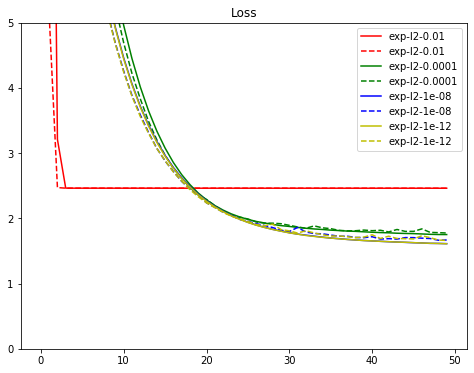

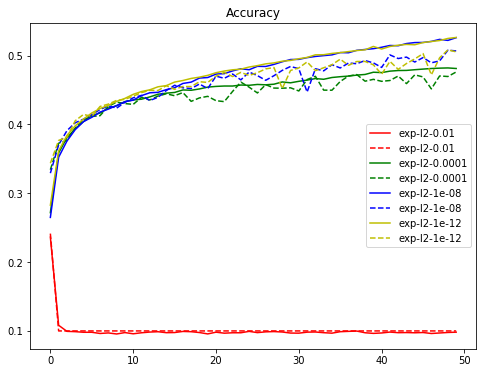

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()